<center>
  <img src="https://cdn.pixabay.com/photo/2016/01/22/08/17/banner-1155437_960_720.png" alt="Header">
</center>

### Proyecto TEL - 354

# Análisis de Factores que Influyen en el Éxito de Películas

#### Screen Team:

- Antonia Valenzuela
- Javier Cáceres

# Introducción

En la industria del cine, prever el éxito financiero de una película es crucial para los productores al momento de invertir en nuevos proyectos. Este trabajo se enfoca en el estudio de adaptaciones cinematográficas para identificar las posibles razones detrás de su éxito e intentar predecir los ingresos de una película a partir de sus características.

El proceso a desarrollar consiste en:
1. Transformar los datos obtenidos de TMDB para eliminar atributos no relevantes y codificar las variables categóricas para poder utilizarlas correctamente.
2. Realizar un análisis exploratorio para identificar tendencias en el dataset
3. Aplicar un algoritmo de regresión a los datos procesados con el propósito de predecir las ganancias.


## Objetivos principales

- Identificación de variables relevantes en el éxito de adaptaciones.
- Predecir ganancias en base a estas características.

# Proceso

## Cargar Datos

- [movies.csv](https://www.kaggle.com/datasets/akshaypawar7/millions-of-movies/data)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd

df_movies = pd.read_csv("movies.csv")
df_movies

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations
0,615656,Meg 2: The Trench,Action-Science Fiction-Horror,en,An exploratory dive into the deepest depths of...,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,2023-08-02,129000000.0,352056482.0,116.0,Released,Back for seconds.,7.079,1365.0,Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...,based on novel or book-sequel-kaiju,/4m1Au3YkjqsxF8iwQy0fPYSxE0h.jpg,/qlxy8yo5bcgUw2KAmmojUKp4rHd.jpg,1006462-298618-569094-1061181-346698-1076487-6...
1,758323,The Pope's Exorcist,Horror-Mystery-Thriller,en,Father Gabriele Amorth Chief Exorcist of the V...,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023-04-05,18000000.0,65675816.0,103.0,Released,Inspired by the actual files of Father Gabriel...,7.433,545.0,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,spain-rome italy-vatican-pope-pig-possession-c...,/9JBEPLTPSm0d1mbEcLxULjJq9Eh.jpg,/hiHGRbyTcbZoLsYYkO4QiCLYe34.jpg,713704-296271-502356-1076605-1084225-1008005-9...
2,667538,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,When a new threat capable of destroying the en...,5409.104,Skydance-Paramount-di Bonaventura Pictures-Bay...,2023-06-06,200000000.0,407045464.0,127.0,Released,Unite or fall.,7.340,1007.0,Anthony Ramos-Dominique Fishback-Luna Lauren V...,peru-alien-end of the world-based on cartoon-b...,/gPbM0MK8CP8A174rmUwGsADNYKD.jpg,/woJbg7ZqidhpvqFGGMRhWQNoxwa.jpg,496450-569094-298618-385687-877100-598331-4628...
3,693134,Dune: Part Two,Science Fiction-Adventure,en,Follow the mythic journey of Paul Atreides as ...,4742.163,Legendary Pictures,2024-02-27,190000000.0,683813734.0,167.0,Released,Long live the fighters.,8.300,2770.0,Timothée Chalamet-Zendaya-Rebecca Ferguson-Jav...,epic-based on novel or book-fight-sandstorm-sa...,/czembW0Rk1Ke7lCJGahbOhdCuhV.jpg,/xOMo8BRK7PfcJv9JCnx7s5hj0PX.jpg,438631-763215-792307-1011985-467244-634492-359...
4,640146,Ant-Man and the Wasp: Quantumania,Action-Adventure-Science Fiction,en,Super-Hero partners Scott Lang and Hope van Dy...,4425.387,Marvel Studios-Kevin Feige Productions,2023-02-15,200000000.0,475766228.0,125.0,Released,Witness the beginning of a new dynasty.,6.507,2811.0,Paul Rudd-Evangeline Lilly-Jonathan Majors-Kat...,hero-ant-sequel-superhero-based on comic-famil...,/qnqGbB22YJ7dSs4o6M7exTpNxPz.jpg,/m8JTwHFwX7I7JY5fPe4SjqejWag.jpg,823999-676841-868759-734048-267805-965839-1033...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19286,26518,Old Joy,Drama,en,Soon to be a father Mark feels the pressure of...,8.770,Washington Square Films-filmscience-Van Hoy/Kn...,2006-03-25,300000.0,0.0,73.0,Released,NaN,6.300,110.0,Daniel London-Will Oldham-Tanya Smith-Robin Ro...,camping-oregon usa-hiking-road trip-dog-based ...,/4MMqpFUQ24VXhp4i85pM8Ks622K.jpg,/n2MZqGQlXMp1nfC4kPNTCYDvbh1.jpg,8942-57120-582014-558582-985-172533-1791-84332...
19287,15618,Robot Jox,Science Fiction-Action,en,50 years after a nuclear war the two superpowe...,8.769,Empire Pictures-Altar Productions,1989-10-01,10000000.0,0.0,85.0,Released,The ultimate killing machine. Part Man. Part M...,5.600,85.0,Gary Graham-Anne-Marie Johnson-Paul Koslo-Robe...,post-apocalyptic future-mecha-giant robot-pilo...,/uzoxflhwjB8WS1QPTakDz8Edxnf.jpg,/A1G4HAoL69ikZ0Y1tWHrYNDcHXC.jpg,9355-97-11309-9102-9067-10019-9886-2605-1562-8...
19288,788210,V.C. Andrews' Pearl in the Mist,TV Movie-Drama,en,Ruby is hopeful for a new start with her twin ...,8.769,Champlain Media,2021-03-21,0.0,0.0,90.0,Released,NaN,7.500,31.0,Raechelle Banno-Karina Banno-Richard Harmon-Ty...,NaN,/h7nK2qbF9jm5unkC6TppfoUVy3k.jpg,/2jGut3uJrr77vi3BHbkAHVF1I7F.jpg,2-539681-786699-84348-788253-788263-438347-913...
19289,679548,The Alpha Test,Science Fiction-Thriller,en,A suburban family drives their new gadget The ...,8.768,NaN,2021-02-04,0.0,0.0,87.0

In [ ]:
df_movies.dtypes

id                        int64
title                    object
genres                   object
original_language        object
overview                 object
popularity              float64
production_companies     object
release_date             object
budget                  float64
revenue                 float64
runtime                 float64
status                   object
tagline                  object
vote_average            float64
vote_count              float64
credits                  object
keywords                 object
poster_path              object
backdrop_path            object
recommendations          object
dtype: object

## Tabla de acción

$$
\begin{array}{|l|c|l|}
\hline
\text{Característica del Dataset} & \text{Relevancia} & \text{Acciones} \\ \hline
\text{id} & \text{No} &  \\ \hline
\text{title} & \text{No} &  \\ \hline
\text{genres} & \text{Sí} & \text{Codificar} \\ \hline
\text{original_language} & \text{Sí} & \text{Codificar} \\ \hline
\text{overview} & \text{No} &  \\ \hline
\text{popularity} & \text{Sí} & \\ \hline
\text{production_companies} & \text{Sí} & \text{Agrupar} \\ \hline
\text{release_date} & \text{Sí} &  \\ \hline
\text{budget} & \text{Sí} &  \\ \hline
\text{revenue} & \text{Sí} &  \\ \hline
\text{runtime} & \text{Sí} &  \\ \hline
\text{status} & \text{Sí} & \text{Películas Estrenadas} \\ \hline
\text{tagline} & \text{No} &  \\ \hline
\text{vote_average} & \text{Sí} &  \\ \hline
\text{vote_count} & \text{No} &  \\ \hline
\text{credits} & \text{Sí} & \text{Agrupar} \\ \hline
\text{keywords} & \text{Sí} & \text{Tipos de adaptaciones y Evaluar secuelas} \\ \hline
\text{poster_path} & \text{No} & \text{Imágenes} \\ \hline
\text{backdrop_path} & \text{No} & \text{Imágenes} \\ \hline
\text{recommendations} & \text{No} &  \\ \hline
\end{array}
$$

## Filtros
- Películas ya **estrenadas**
- **Adaptaciones** (libros, videojuegos, etc)
- Lenguaje original entre los 10 más comunes

### Columnas importantes

- **Columnas numéricas** descartando los votos en el sitio web
- Fecha de estreno
- Géneros
- Compañías de producción **
- Elenco **

\* Variables categóricas que se deben transformar.

\** Por temas de tiempo no lo consideramos.

Se eliminan aquellas peliculas que tengan presupuesto y ganancias iguales a 0, ya que probablemente sean datos que faltan. También se eliminan las que tengan una duración nula.

### Filtrado inicial

In [ ]:
drop_columns = ["id", "overview", "status", "tagline", "vote_count", "poster_path",
                "backdrop_path", "recommendations", "credits", "production_companies"]

df_filtered = df_movies[df_movies['keywords'].str.contains('based on', case=False, na=False)] # Adaptaciones
df_filtered = df_filtered[df_filtered["status"] == "Released"]
df_filtered.drop(drop_columns, axis=1, inplace=True)
df_filtered = df_filtered[(df_filtered['revenue'] > 0) & (df_filtered['budget'] > 0) | (df_filtered['runtime'] > 0)]
df_filtered.dropna(inplace=True)
df_filtered

,title,genres,original_language,popularity,release_date,budget,revenue,runtime,vote_average,keywords
0,Meg 2: The Trench,Action-Science Fiction-Horror,en,8763.998,2023-08-02,129000000.0,352056482.0,116.0,7.079,based on novel or book-sequel-kaiju
2,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,5409.104,2023-06-06,200000000.0,407045464.0,127.0,7.340,peru-alien-end of the world-based on cartoon-b...
3,Dune: Part Two,Science Fiction-Adventure,en,4742.163,2024-02-27,190000000.0,683813734.0,167.0,8.300,epic-based on novel or book-fight-sandstorm-sa...
4,Ant-Man and the Wasp: Quantumania,Action-Adventure-Science Fiction,en,4425.387,2023-02-15,200000000.0,475766228.0,125.0,6.507,hero-ant-sequel-superhero-based on comic-famil...
10,Spider-Man: Across the Spider-Verse,Action-Adventure-Animation-Science Fiction,en,2550.738,2023-05-31,100000000.0,512609552.0,140.0,8.640,sacrifice-villain-comic book-sequel-superhero-...
...,...,...,...,...,...,...,...,...,...,...
19252,Shadows of Forgotten Ancestors,Drama-Romance,uk,8.781,1965-10-18,0.0,0.0,91.0,7.684,based on novel or book-forbidden love-sorcery-...
19254,Sacrifice,Thriller-Crime-Mystery,en,8.779,2016-04-29,0.0,0.0,91.0,5.200,based on novel or book-dead body-doctor
19258,McCabe & Mrs. Miller,Western-Drama,en,8.778,1971-06-24,0.0,0.0,120.0,7.200,based on novel or book-brothel-snow-gambler-mi...
19284,Alex & Emma,Comedy-Romance,en,8.770,2003-06-16,30000000.0,15368897.0,96.0,5.200,gambling-casino-based on novel or book-vandali...


## Análisis por categorías

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grafica las ganancias e ingresos por categoría
def plot_budget_revenue(df, cat, rot=0):
    # Preparar los datos para el gráfico agrupado
    melted_stats = df.melt(id_vars=cat, value_vars=['budget', 'revenue'], var_name='Metric', value_name='Value')

    # Gráfico de barras agrupadas para presupuesto y recaudación promedio por género
    plt.figure(figsize=(14, 7))
    sns.barplot(x=cat, y='Value', hue='Metric', data=melted_stats)
    plt.title(f'Average Budget and Revenue grouped by {cat}')
    plt.xticks(rotation=rot)
    plt.xlabel(cat)
    plt.ylabel('Value')
    plt.legend()
    plt.show()

### Idioma

In [ ]:
# Agrupar películas por idioma
df_language = df_filtered.groupby('original_language')[
    ["popularity", "revenue", "budget", "runtime", "vote_average"]].mean()
language_count = df_filtered['original_language'].value_counts()

df_language["count"] = language_count
df_language.reset_index(inplace=True)
df_language.sort_values(by="count", ascending=False, inplace=True)
df_language

,original_language,popularity,revenue,budget,runtime,vote_average,count
8,en,47.981971,9.530873e+07,3.143437e+07,109.602036,6.653490,2357
18,ja,28.873261,1.150128e+07,1.452136e+06,101.623762,6.983551,303
13,fr,15.558760,1.453857e+07,8.582468e+06,104.916667,6.601188,96
9,es,39.097965,3.044682e+06,3.162080e+06,108.070175,6.431246,57
19,ko,59.911868,1.637676e+07,5.853013e+06,119.943396,7.077302,53
6,de,12.727545,7.196964e+06,1.367871e+06,114.848485,6.923848,33
17,it,22.392606,2.817502e+06,2.978145e+06,114.000000,6.624424,33
30,zh,19.689185,9.196853e+07,1.894407e+07,123.481481,6.854593,27
14,hi,12.745632,1.551928e+07,7.122799e+06,153.473684,4.854105,19
21,no,191.762667,2.813728e+06,1.374606e+06,101.583333,6.468417,12


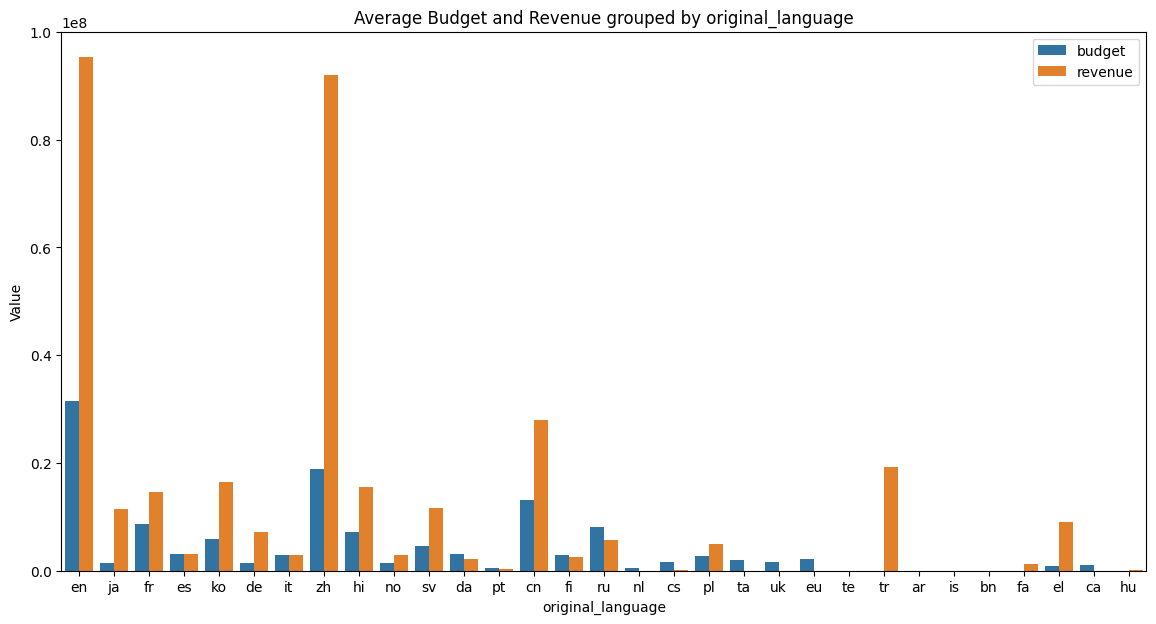

In [ ]:
plot_budget_revenue(df_language, 'original_language')

### Fecha

In [ ]:
# Cambiar fecha por mes de estreno
dates = df_filtered["release_date"]
df_filtered['month'] = pd.to_datetime(dates).dt.month
df_filtered.drop('release_date', axis=1, inplace=True)
df_filtered

,title,genres,original_language,popularity,budget,revenue,runtime,vote_average,keywords,month
0,Meg 2: The Trench,Action-Science Fiction-Horror,en,8763.998,129000000.0,352056482.0,116.0,7.079,based on novel or book-sequel-kaiju,8
2,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,5409.104,200000000.0,407045464.0,127.0,7.340,peru-alien-end of the world-based on cartoon-b...,6
3,Dune: Part Two,Science Fiction-Adventure,en,4742.163,190000000.0,683813734.0,167.0,8.300,epic-based on novel or book-fight-sandstorm-sa...,2
4,Ant-Man and the Wasp: Quantumania,Action-Adventure-Science Fiction,en,4425.387,200000000.0,475766228.0,125.0,6.507,hero-ant-sequel-superhero-based on comic-famil...,2
10,Spider-Man: Across the Spider-Verse,Action-Adventure-Animation-Science Fiction,en,2550.738,100000000.0,512609552.0,140.0,8.640,sacrifice-villain-comic book-sequel-superhero-...,5
...,...,...,...,...,...,...,...,...,...,...
19252,Shadows of Forgotten Ancestors,Drama-Romance,uk,8.781,0.0,0.0,91.0,7.684,based on novel or book-forbidden love-sorcery-...,10
19254,Sacrifice,Thriller-Crime-Mystery,en,8.779,0.0,0.0,91.0,5.200,based on novel or book-dead body-doctor,4
19258,McCabe & Mrs. Miller,Western-Drama,en,8.778,0.0,0.0,120.0,7.200,based on novel or book-brothel-snow-gambler-mi...,6
19284,Alex & Emma,Comedy-Romance,en,8.770,30000000.0,15368897.0,96.0,5.200,gambling-casino-based on novel or book-vandali...,6


In [ ]:
df_months = df_filtered.groupby('month')[
    ["popularity", "revenue", "budget", "runtime", "vote_average"]].mean()
month_count = df_filtered['month'].value_counts()

df_months["count"] = month_count
df_months.reset_index(inplace=True)
df_months.sort_values(by="count", ascending=False, inplace=True)
df_months

,month,popularity,revenue,budget,runtime,vote_average,count
11,12,34.489223,8.887978e+07,2.767879e+07,117.502747,6.835497,364
8,9,26.542727,3.992504e+07,1.566711e+07,107.856338,6.672420,355
9,10,32.331916,4.984958e+07,1.749965e+07,109.884735,6.632361,321
10,11,48.428489,1.034176e+08,3.294621e+07,113.105839,6.644807,274
6,7,39.998921,1.192749e+08,3.612314e+07,107.599206,6.733258,252
1,2,66.927693,5.968754e+07,2.065848e+07,105.145228,6.715573,241
2,3,29.741473,7.630289e+07,2.548192e+07,107.688797,6.642606,241
7,8,60.829222,3.475601e+07,1.624205e+07,103.769874,6.677565,239
5,6,63.291526,1.271238e+08,3.985874e+07,112.103286,6.653901,213
3,4,53.045222,1.053568e+08,2.817184e+07,109.707071,6.463323,198


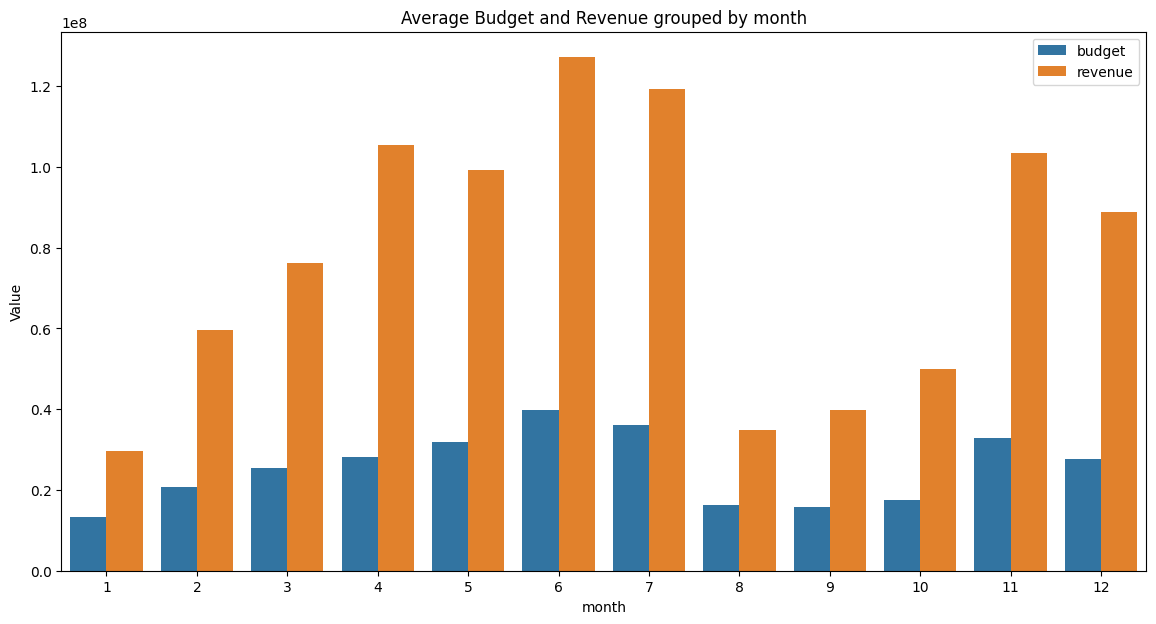

In [ ]:
plot_budget_revenue(df_months, "month")

### Tipos de adaptaciones

En el dataset original algunas columnas tienen varios valores separados por guión '-', estos serán transformados a lista para poder trabajar de mejor manera.

In [ ]:
def transform_categories_to_list(og_df, cat):
    df = og_df.copy()
    df.loc[:, cat] = df[cat].fillna('')
    # Separar valores dentro de la categoría
    df.loc[:, cat] = df[cat].apply(lambda x: x.split('-') if isinstance(x, str) else [x])
    return df

In [ ]:
# Obtiene solo el tipo de adaptación a partir de la columna 'keywords'
def filter_adaptations(array):
    key = 'based on '
    type = [x.replace(key, '') for x in array if key in x]
    return type[0]

In [ ]:
df_filtered = transform_categories_to_list(df_filtered, 'keywords')
df_filtered['adaptation_type'] = df_filtered['keywords'].apply(filter_adaptations)
df_filtered.drop('keywords', axis=1, inplace=True)
df_filtered

,title,genres,original_language,popularity,budget,revenue,runtime,vote_average,month,adaptation_type
0,Meg 2: The Trench,Action-Science Fiction-Horror,en,8763.998,129000000.0,352056482.0,116.0,7.079,8,novel or book
2,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,5409.104,200000000.0,407045464.0,127.0,7.340,6,cartoon
3,Dune: Part Two,Science Fiction-Adventure,en,4742.163,190000000.0,683813734.0,167.0,8.300,2,novel or book
4,Ant-Man and the Wasp: Quantumania,Action-Adventure-Science Fiction,en,4425.387,200000000.0,475766228.0,125.0,6.507,2,comic
10,Spider-Man: Across the Spider-Verse,Action-Adventure-Animation-Science Fiction,en,2550.738,100000000.0,512609552.0,140.0,8.640,5,comic
...,...,...,...,...,...,...,...,...,...,...
19252,Shadows of Forgotten Ancestors,Drama-Romance,uk,8.781,0.0,0.0,91.0,7.684,10,novel or book
19254,Sacrifice,Thriller-Crime-Mystery,en,8.779,0.0,0.0,91.0,5.200,4,novel or book
19258,McCabe & Mrs. Miller,Western-Drama,en,8.778,0.0,0.0,120.0,7.200,6,novel or book
19284,Alex & Emma,Comedy-Romance,en,8.770,30000000.0,15368897.0,96.0,5.200,6,novel or book


In [ ]:
df_adaps = df_filtered.groupby('adaptation_type')[
    ["popularity", "revenue", "budget", "runtime", "vote_average"]].mean()
type_count = df_filtered['adaptation_type'].value_counts()

df_adaps["count"] = type_count
df_adaps.reset_index(inplace=True)
df_adaps.sort_values(by="count", ascending=False, inplace=True)
df_adaps

,adaptation_type,popularity,revenue,budget,runtime,vote_average,count
16,novel or book,39.495398,6.138526e+07,2.111799e+07,112.732306,6.702110,1427
24,true story,31.886505,4.571113e+07,1.611598e+07,116.066514,6.809037,436
8,comic,66.611966,1.915836e+08,5.895786e+07,102.531250,6.535259,352
12,manga,43.889593,1.339605e+07,3.338044e+06,100.714286,6.933621,182
17,play or musical,19.051709,4.044054e+07,1.134740e+07,116.204724,6.794315,127
26,video game,35.526755,7.834058e+07,2.694227e+07,95.397959,6.064367,98
7,children's book,38.306119,9.590484e+07,3.316562e+07,93.731343,6.264582,67
19,short story,21.459955,2.575962e+07,1.310417e+07,104.651515,6.672652,66
23,toy,41.498695,1.226879e+08,2.893220e+07,86.711864,6.578847,59
25,tv series,44.763711,8.391826e+07,3.214925e+07,98.488889,6.728400,45


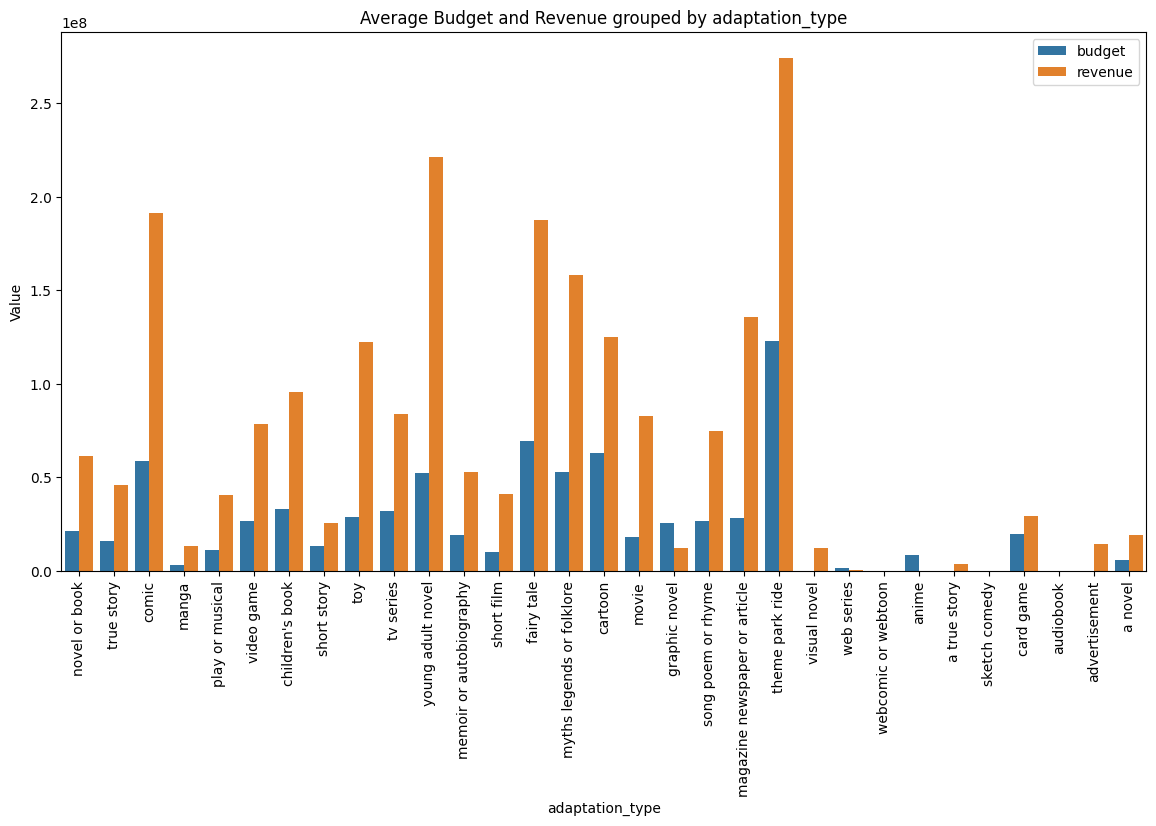

In [ ]:
plot_budget_revenue(df_adaps, "adaptation_type", rot=90)

### Género

In [ ]:
df_genres = transform_categories_to_list(df_filtered, 'genres')
df_genres = df_genres.explode('genres')

genre_count = df_genres['genres'].value_counts()
df_genres = df_genres.groupby('genres')[["popularity", "revenue", "budget", "runtime", "vote_average"]].mean()

df_genres["count"] = genre_count
df_genres.reset_index(inplace=True)
df_genres

,genres,popularity,revenue,budget,runtime,vote_average,count
0,Action,76.346712,1.407542e+08,4.704768e+07,108.728039,6.547260,831
1,Adventure,74.609763,1.890071e+08,5.786534e+07,110.283019,6.601740,689
2,Animation,40.932489,4.779196e+07,1.286497e+07,84.770270,6.946331,444
3,Comedy,31.026682,6.560821e+07,2.166087e+07,101.870871,6.508476,666
4,Crime,28.383958,5.195804e+07,1.986699e+07,113.321867,6.654690,407
5,Documentary,15.231800,1.342593e+07,1.820000e+06,82.000000,6.899200,5
6,Drama,28.863135,4.449533e+07,1.525409e+07,115.233010,6.846765,1648
7,Family,41.193698,9.016560e+07,3.214863e+07,93.736715,6.582309,414
8,Fantasy,50.656330,1.363322e+08,4.137375e+07,103.671533,6.577949,548
9,History,37.434581,4.893228e+07,2.291471e+07,128.562264,7.034740,265


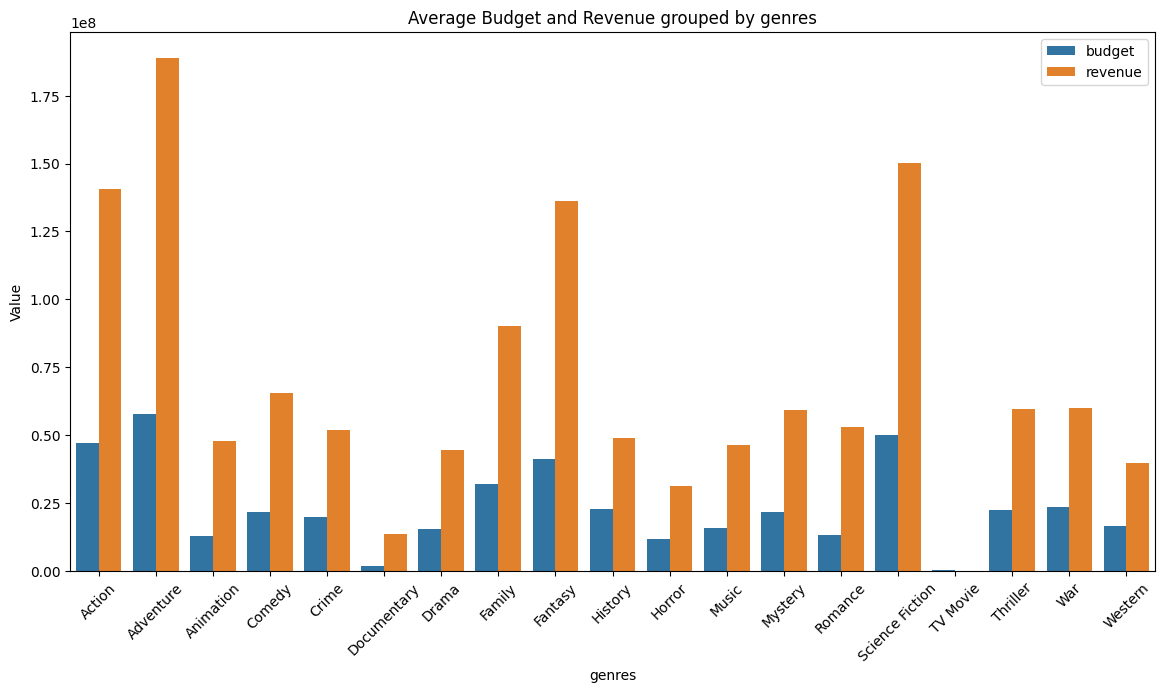

In [ ]:
plot_budget_revenue(df_genres, "genres", rot=45)

## Filtrado adicional

Nos quedamos con los 10 idiomas con mayor cantidad de películas.

In [ ]:
top_languages = language_count.head(10).index

df_filtered = df_filtered[df_filtered['original_language'].isin(top_languages)]
df_filtered

,title,genres,original_language,popularity,budget,revenue,runtime,vote_average,month,adaptation_type
0,Meg 2: The Trench,Action-Science Fiction-Horror,en,8763.998,129000000.0,352056482.0,116.0,7.079,8,novel or book
2,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,5409.104,200000000.0,407045464.0,127.0,7.340,6,cartoon
3,Dune: Part Two,Science Fiction-Adventure,en,4742.163,190000000.0,683813734.0,167.0,8.300,2,novel or book
4,Ant-Man and the Wasp: Quantumania,Action-Adventure-Science Fiction,en,4425.387,200000000.0,475766228.0,125.0,6.507,2,comic
10,Spider-Man: Across the Spider-Verse,Action-Adventure-Animation-Science Fiction,en,2550.738,100000000.0,512609552.0,140.0,8.640,5,comic
...,...,...,...,...,...,...,...,...,...,...
19226,A United Kingdom,Drama-History,en,8.791,14000000.0,13819139.0,111.0,6.700,11,novel or book
19254,Sacrifice,Thriller-Crime-Mystery,en,8.779,0.0,0.0,91.0,5.200,4,novel or book
19258,McCabe & Mrs. Miller,Western-Drama,en,8.778,0.0,0.0,120.0,7.200,6,novel or book
19284,Alex & Emma,Comedy-Romance,en,8.770,30000000.0,15368897.0,96.0,5.200,6,novel or book


Filtramos por tipos de adaptaciones que tengan al menos 100 películas

In [ ]:
top_adaps = df_adaps[df_adaps['count'] >= 100]['adaptation_type']
df_filtered = df_filtered[df_filtered['adaptation_type'].isin(top_adaps)]
df_filtered

,title,genres,original_language,popularity,budget,revenue,runtime,vote_average,month,adaptation_type
0,Meg 2: The Trench,Action-Science Fiction-Horror,en,8763.998,129000000.0,352056482.0,116.0,7.079,8,novel or book
3,Dune: Part Two,Science Fiction-Adventure,en,4742.163,190000000.0,683813734.0,167.0,8.300,2,novel or book
4,Ant-Man and the Wasp: Quantumania,Action-Adventure-Science Fiction,en,4425.387,200000000.0,475766228.0,125.0,6.507,2,comic
10,Spider-Man: Across the Spider-Verse,Action-Adventure-Animation-Science Fiction,en,2550.738,100000000.0,512609552.0,140.0,8.640,5,comic
16,Knights of the Zodiac,Fantasy-Action-Adventure,en,1882.774,60000000.0,6794519.0,113.0,6.561,4,manga
...,...,...,...,...,...,...,...,...,...,...
19221,Thor: Tales of Asgard,Adventure-Animation-Action,en,8.793,0.0,3100000.0,77.0,6.330,5,comic
19226,A United Kingdom,Drama-History,en,8.791,14000000.0,13819139.0,111.0,6.700,11,novel or book
19254,Sacrifice,Thriller-Crime-Mystery,en,8.779,0.0,0.0,91.0,5.200,4,novel or book
19258,McCabe & Mrs. Miller,Western-Drama,en,8.778,0.0,0.0,120.0,7.200,6,novel or book


## Codificación

In [ ]:
# Realiza one-hot a partir de los valores en una lista
def transform_categories(og_df, cat):
    df = transform_categories_to_list(og_df, cat)

    # Obtener una lista de todos los valores únicos
    all_genres = set()
    for sublist in df[cat]:
        if isinstance(sublist, list):
            for genre in sublist:
                if isinstance(genre, str):
                    all_genres.add(genre)

    # Crear nuevas columnas con codificación binaria
    for genre in all_genres:
        df.loc[:, genre] = df[cat].apply(lambda x: 1 if genre in x else 0)

    df = df.drop(columns=[cat])

    return df


In [ ]:
df_filtered = transform_categories(df_filtered, 'genres')

titles = df_filtered["title"]
df_filtered = pd.get_dummies(df_filtered.drop(["title"], axis=1))

df_filtered

,popularity,budget,revenue,runtime,vote_average,month,Fantasy,Music,Action,Mystery,...,original_language_it,original_language_ja,original_language_ko,original_language_no,original_language_zh,adaptation_type_comic,adaptation_type_manga,adaptation_type_novel or book,adaptation_type_play or musical,adaptation_type_true story
0,8763.998,129000000.0,352056482.0,116.0,7.079,8,0,0,1,0,...,False,False,False,False,False,False,False,True,False,False
3,4742.163,190000000.0,683813734.0,167.0,8.300,2,0,0,0,0,...,False,False,False,False,False,False,False,True,False,False
4,4425.387,200000000.0,475766228.0,125.0,6.507,2,0,0,1,0,...,False,False,False,False,False,True,False,False,False,False
10,2550.738,100000000.0,512609552.0,140.0,8.640,5,0,0,1,0,...,False,False,False,False,False,True,False,False,False,False
16,1882.774,60000000.0,6794519.0,113.0,6.561,4,1,0,1,0,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19221,8.793,0.0,3100000.0,77.0,6.330,5,0,0,1,0,...,False,False,False,False,False,True,False,False,False,False
19226,8.791,14000000.0,13819139.0,111.0,6.700,11,0,0,0,0,...,False,False,False,False,False,False,False,True,False,False
19254,8.779,0.0,0.0,91.0,5.200,4,0,0,0,1,...,False,False,False,False,False,False,False,True,False,False
19258,8.778,0.0,0.0,120.0,7.200,6,0,0,0,0,...,False,False,False,False,False,False,False,True,False,False


## Visualización de Datos (general)

### Estadísticas

In [ ]:
df_filtered.describe()

,popularity,budget,revenue,runtime,vote_average,month,Fantasy,Music,Action,Mystery,...,Crime,Horror,Documentary,Animation,Comedy,Romance,History,War,Thriller,Adventure
count,2460.000000,2.460000e+03,2.460000e+03,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,...,2460.000000,2460.00000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000
mean,41.833647,2.427745e+07,7.402428e+07,111.005285,6.726541,7.097967,0.144715,0.019106,0.259350,0.087398,...,0.144309,0.09065,0.001220,0.117886,0.208943,0.181707,0.095528,0.054472,0.234146,0.200000
std,239.390696,4.529707e+07,1.864999e+08,24.345461,0.996768,3.528504,0.351885,0.136924,0.438367,0.282475,...,0.351474,0.28717,0.034907,0.322539,0.406636,0.385682,0.294003,0.226992,0.423550,0.400081
min,8.770000,0.000000e+00,0.000000e+00,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.657750,0.000000e+00,0.000000e+00,97.000000,6.300000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16.547000,3.500000e+06,5.703708e+06,110.000000,6.825500,8.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,29.226000,2.800000e+07,5.525105e+07,124.000000,7.321000,10.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8763.998000,3.650000e+08,2.799439e+09,242.000000,9.000000,12.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Cálculo de matriz de correlación y su representación a través de heatmap

In [ ]:
df_filtered.columns

Index(['popularity', 'budget', 'revenue', 'runtime', 'vote_average', 'month',
       'Fantasy', 'Music', 'Action', 'Mystery', 'Family', 'Drama', 'Western',
       'Science Fiction', 'TV Movie', 'Crime', 'Horror', 'Documentary',
       'Animation', 'Comedy', 'Romance', 'History', 'War', 'Thriller',
       'Adventure', 'original_language_de', 'original_language_en',
       'original_language_es', 'original_language_fr', 'original_language_hi',
       'original_language_it', 'original_language_ja', 'original_language_ko',
       'original_language_no', 'original_language_zh', 'adaptation_type_comic',
       'adaptation_type_manga', 'adaptation_type_novel or book',
       'adaptation_type_play or musical', 'adaptation_type_true story'],
      dtype='object')

### Correlación entre géneros y revenue

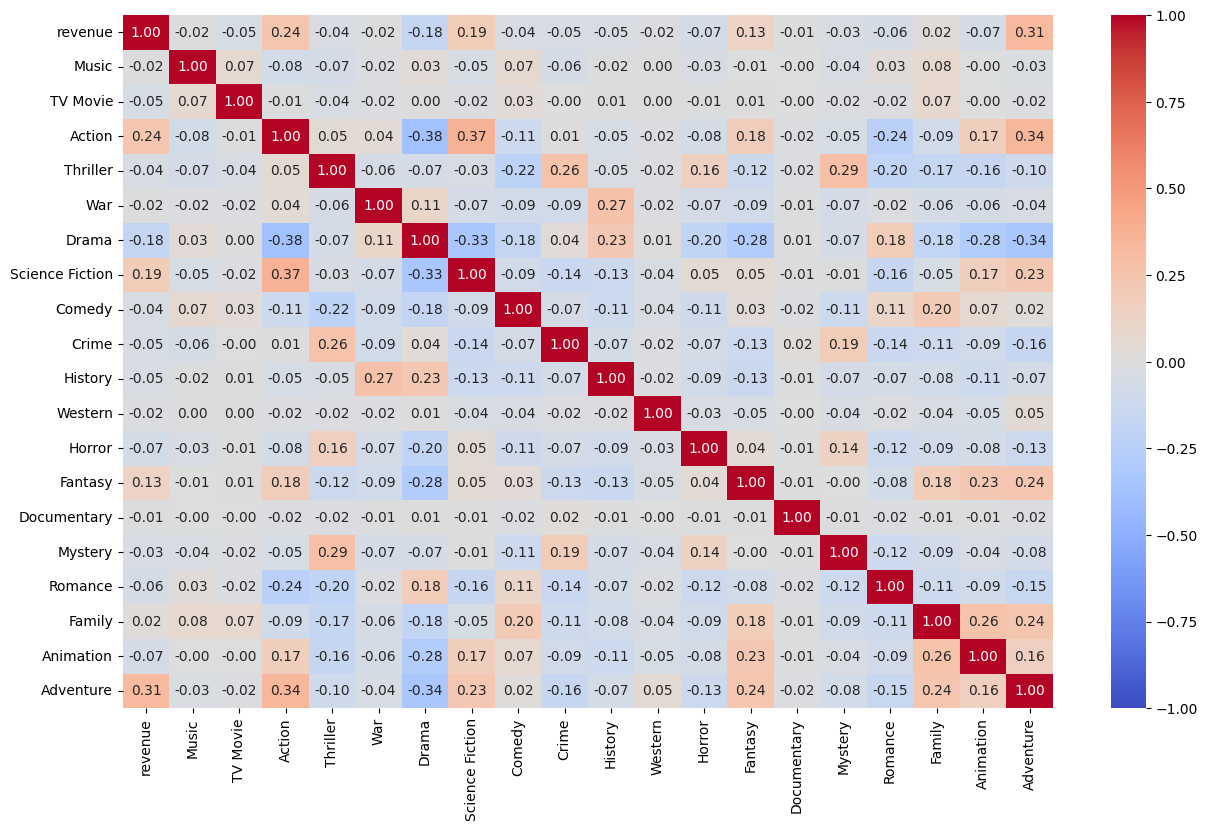

In [ ]:
cats = ['revenue', 'Music', 'TV Movie', 'Action', 'Thriller', 'War', 'Drama',
       'Science Fiction', 'Comedy', 'Crime', 'History', 'Western', 'Horror',
       'Fantasy', 'Documentary', 'Mystery', 'Romance', 'Family', 'Animation',
       'Adventure']

plt.figure(figsize=(15, 9))
sns.heatmap(df_filtered[cats].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="coolwarm")
plt.show()

### Correlación entre idiomas y revenue

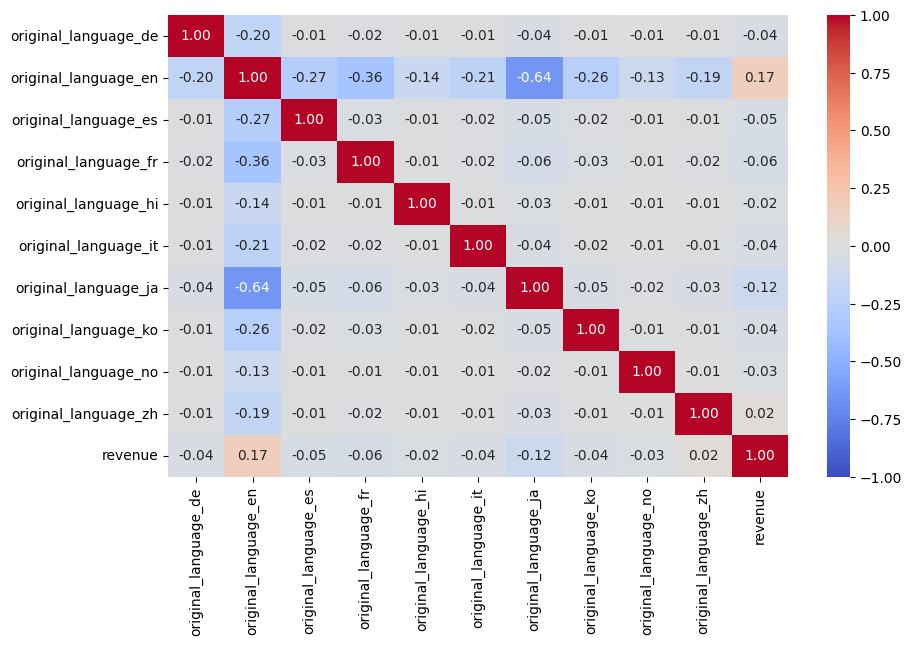

In [ ]:
cats = [l for l in df_filtered.columns if "language" in l]
cats.append("revenue")

plt.figure(figsize=(10, 6))
sns.heatmap(df_filtered[cats].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="coolwarm")
plt.show()

### Correlación entre tipo de adaptación y revenue

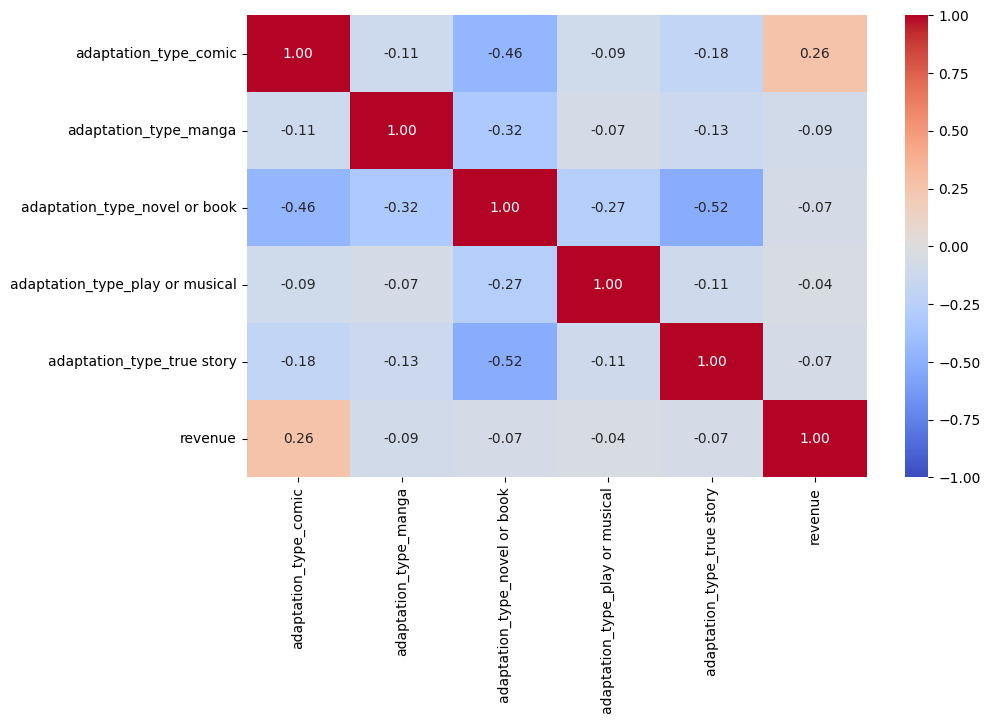

In [ ]:
cats = [l for l in df_filtered.columns if "adaptation" in l]
cats.append("revenue")

plt.figure(figsize=(10, 6))
sns.heatmap(df_filtered[cats].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="coolwarm")
plt.show()

### Heatmap con todas las variables

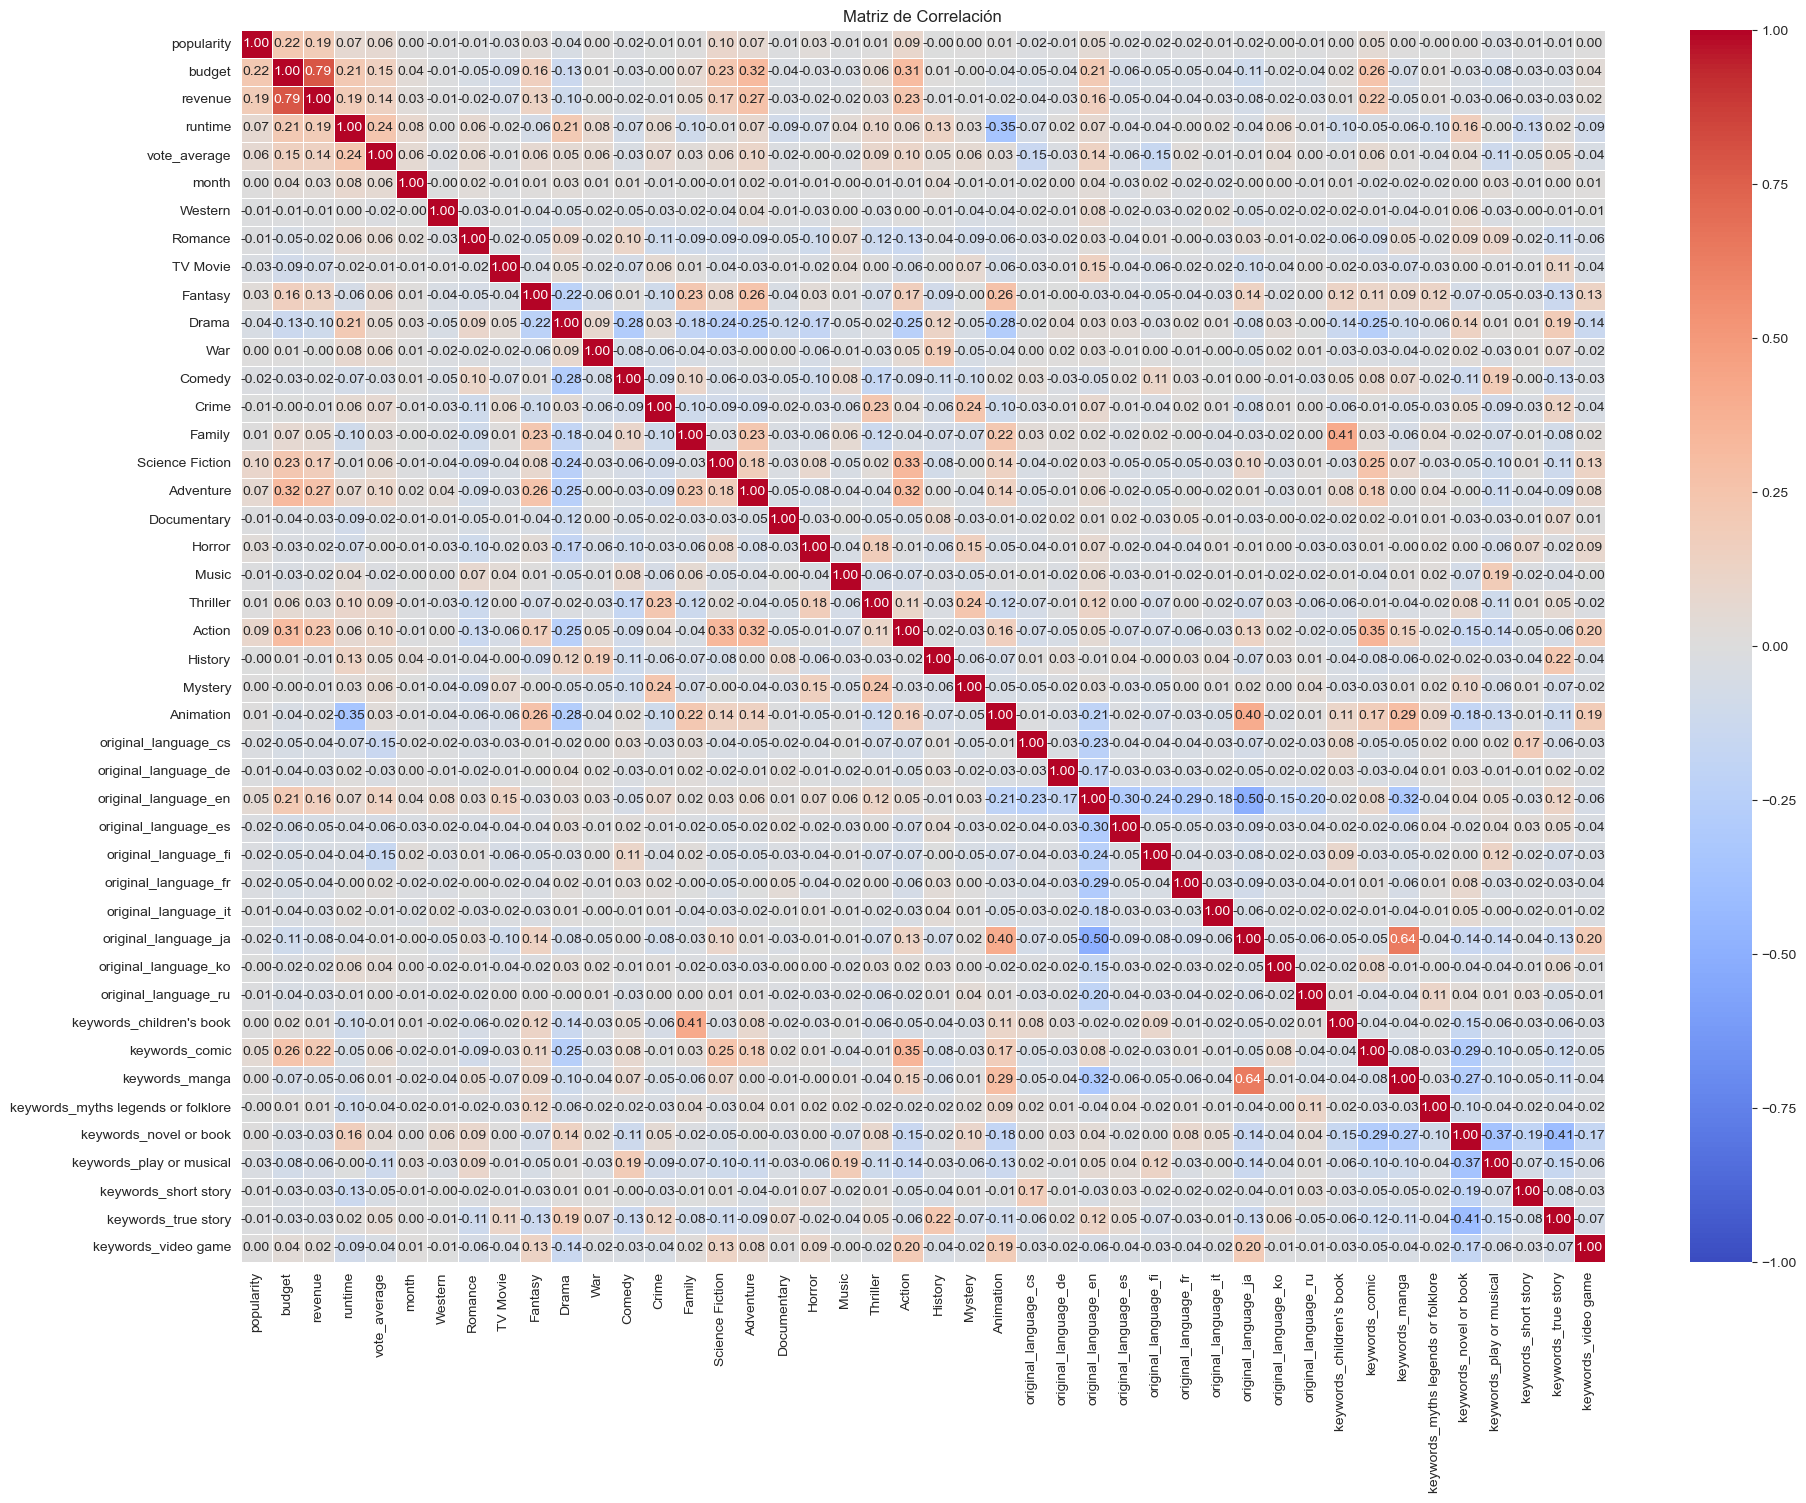

In [ ]:
plt.figure(figsize=(22, 16))

correlations = df_filtered.corr()
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f", linewidth=.5, vmin=-1, vmax=1)

plt.title('Matriz de Correlación')
plt.show()

### Pairplot con las 5 variables más correlacionadas a las ganancias

In [ ]:
var = "revenue"
top_correlations = correlations.loc[var].abs().sort_values(ascending=False).drop(var).head(5)
top_correlations

budget            0.786007
Adventure         0.262985
Action            0.235157
keywords_comic    0.220533
popularity        0.193917
Name: revenue, dtype: float64

<Figure size 640x480 with 0 Axes>

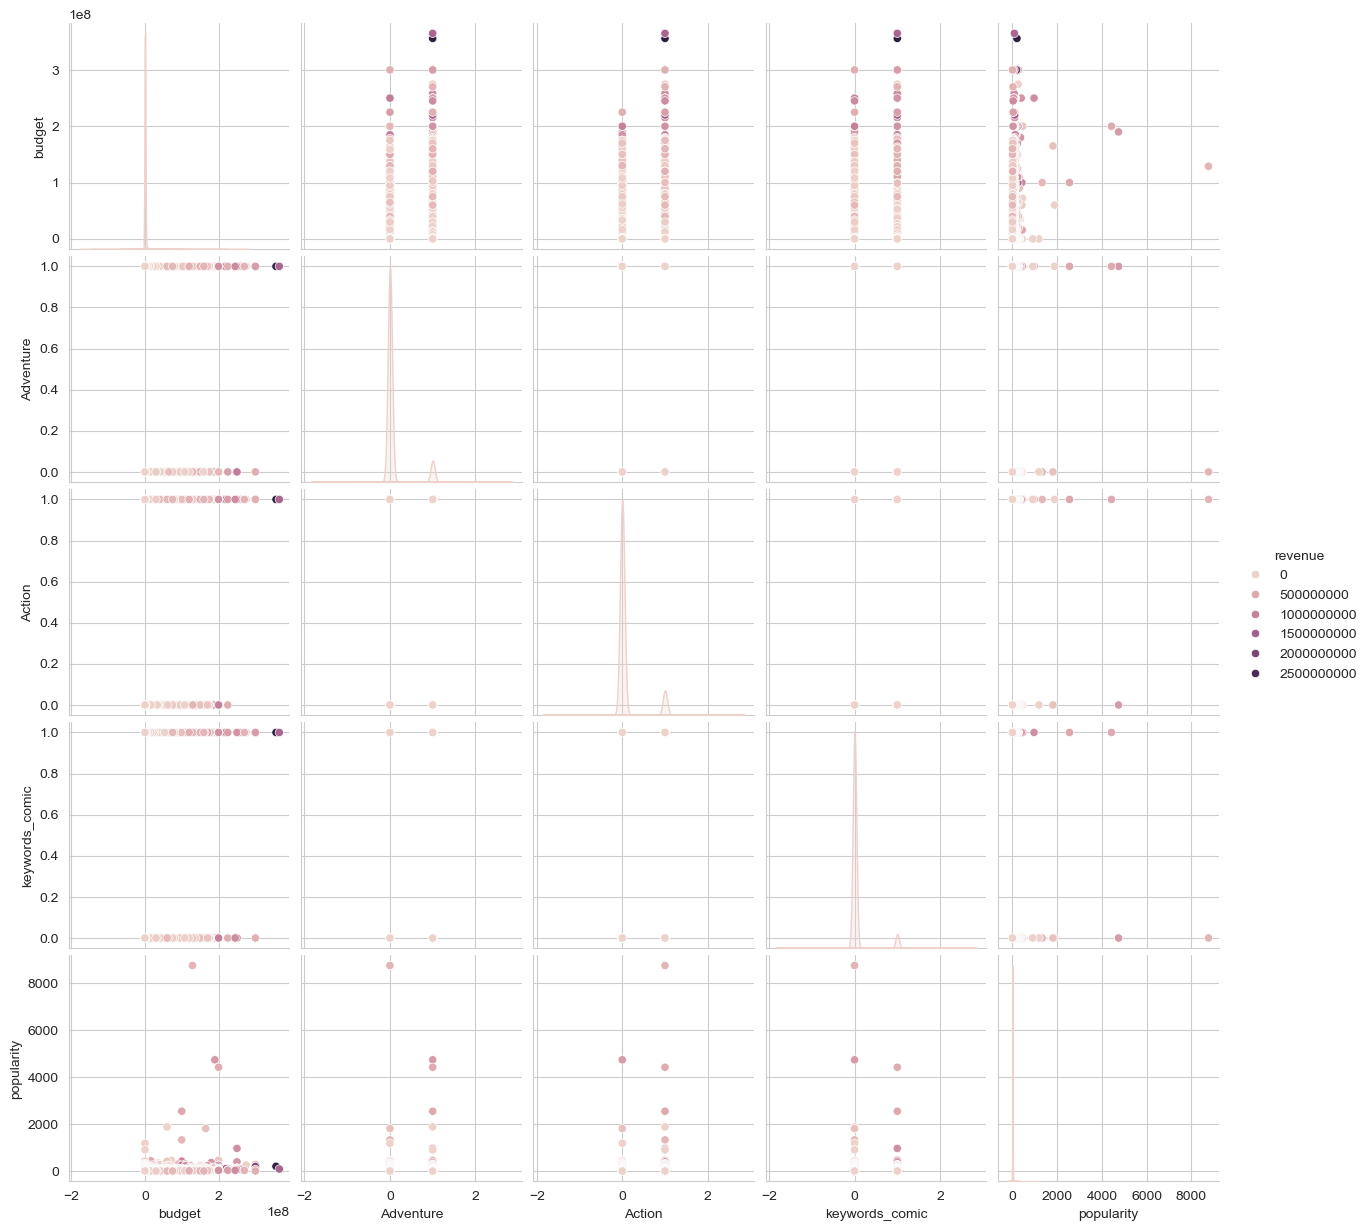

In [ ]:
plt.figure()
sns.pairplot(df_filtered, vars=top_correlations.index, hue="revenue")
plt.show()

## Regresión

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Eliminamos la variable objetivo y otras que no sean útiles para la regresión
X = df_filtered.drop(['revenue', 'popularity', 'vote_average'], axis=1)
y = df_filtered['revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### Error obtenido

In [ ]:
import numpy as np
y_pred = rf_model.predict(X_test)
y_train_pred = rf_model.predict(X_train)

rf_train_mse = mean_squared_error(y_train, y_train_pred)
rf_test_mse = mean_squared_error(y_test, y_pred)

print("Random Forest")
print(f"Training MSE: {rf_train_mse}")
print(f"Training RMSE: {np.sqrt(rf_train_mse)}")

print(f"Test MSE: {rf_test_mse}")
print(f"Test RMSE: {np.sqrt(rf_test_mse)}")

Random Forest
Training MSE: 2169049776933254.0
Training RMSE: 46573058.4880707
Test MSE: 1.4033604376546692e+16
Test RMSE: 118463514.95944518


### Importancia de las características

#### Individual

In [ ]:
feature_importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
0,budget,7.072655e-01
1,runtime,1.043141e-01
2,month,5.087629e-02
17,Romance,2.471516e-02
21,Adventure,1.635628e-02
36,adaptation_type_true story,1.160596e-02
32,adaptation_type_comic,8.786000e-03
3,Fantasy,8.105000e-03
18,History,7.621047e-03
20,Thriller,6.479661e-03


#### Agrupadas por categorías

In [ ]:
feature_group_mapping = {
    'budget': 'budget',
    'runtime': 'runtime',
    'month': 'month',
    **{genre: 'genre' for genre in ['War', 'Drama', 'Music', 'Romance', 'Family', 'History', 'Documentary', 'Thriller', 'Horror', 'Western', 'Animation', 'Mystery', 'Action', 'TV Movie', 'Adventure', 'Crime', 'Science Fiction', 'Comedy', 'Fantasy']},
    **{lang: 'language' for lang in ['original_language_cs', 'original_language_de', 'original_language_en', 'original_language_es', 'original_language_fi', 'original_language_fr', 'original_language_it', 'original_language_ja', 'original_language_ko', 'original_language_ru']},
    **{adaptation: 'adaptation_type' for adaptation in ["keywords_children's book", 'keywords_comic', 'keywords_manga', 'keywords_novel or book', 'keywords_play or musical', 'keywords_short story', 'keywords_true story', 'keywords_video game']}
}

# Asignar grupos a las características
feature_importance_df['group'] = feature_importance_df['Feature'].map(feature_group_mapping)

# Agrupar por grupo y sumar los valores de importancia
grouped_df = feature_importance_df.groupby('group')['Importance'].sum().reset_index()

grouped_df = grouped_df.sort_values(by='Importance', ascending=False)
grouped_df

,group,Importance
0,budget,0.707265
1,genre,0.105035
4,runtime,0.104314
3,month,0.050876
2,language,0.001386


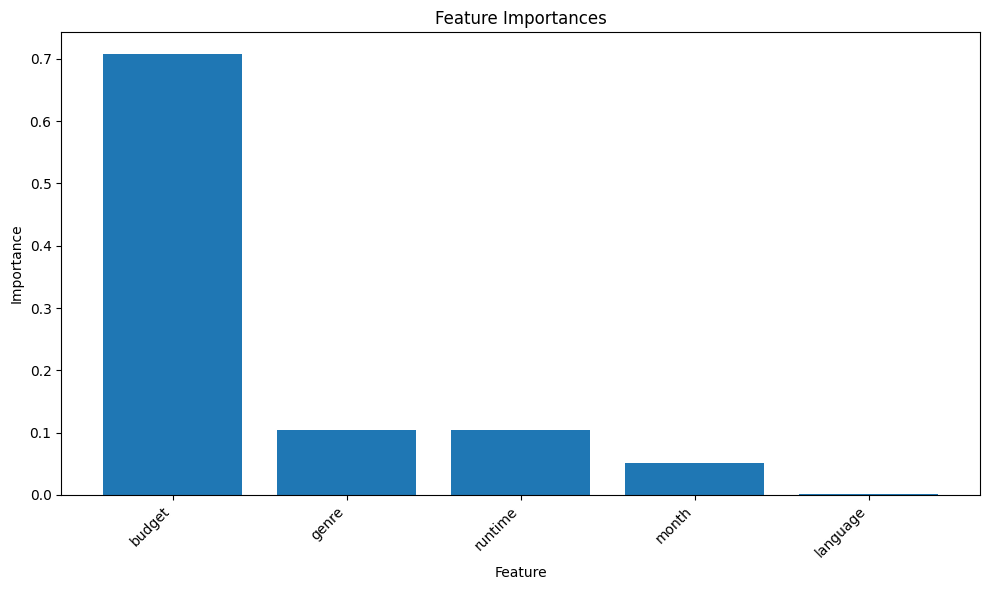

In [ ]:
plt.figure(figsize=(10, 6))
bars = plt.bar(grouped_df['group'], grouped_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

#### Importancia de cada categoría dentro de su grupo

In [ ]:
def plot_group_importance(df, group_name):
    group_df = df[df['group'] == group_name]

    plt.figure(figsize=(10, 6))
    plt.bar(group_df['Feature'], group_df['Importance'])
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.title(f'Importance of Features in Group: {group_name}')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

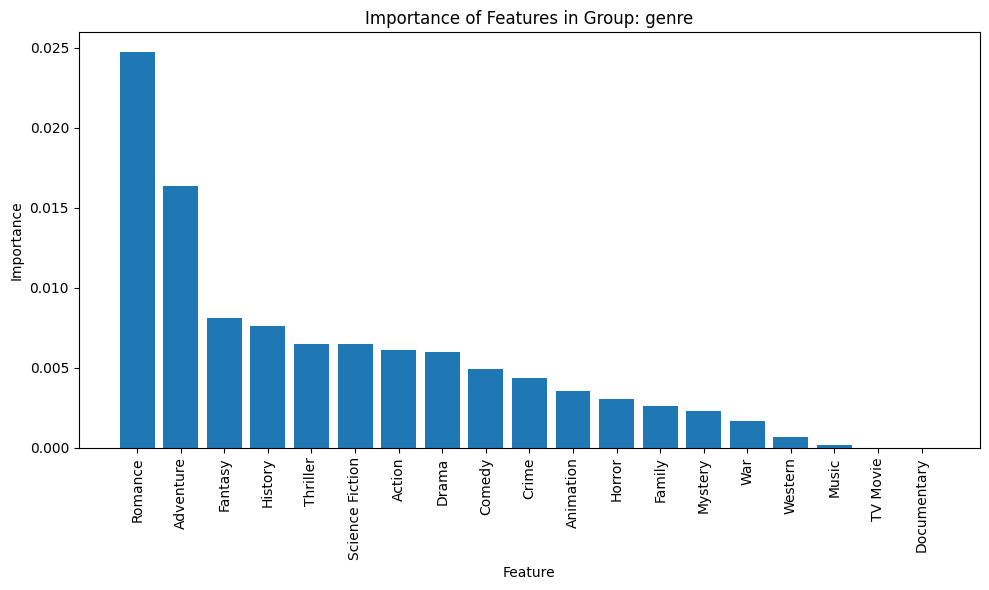

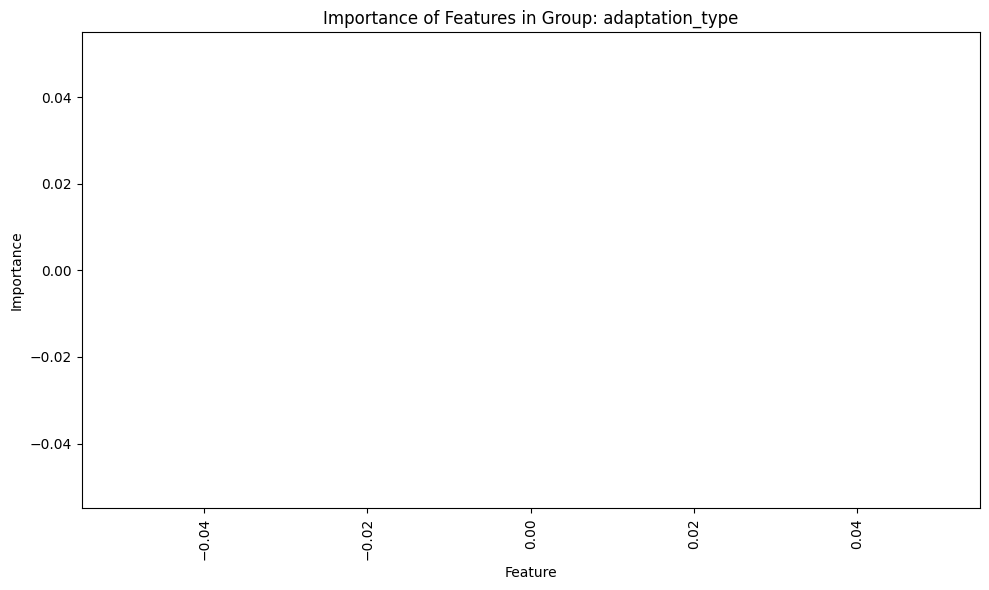

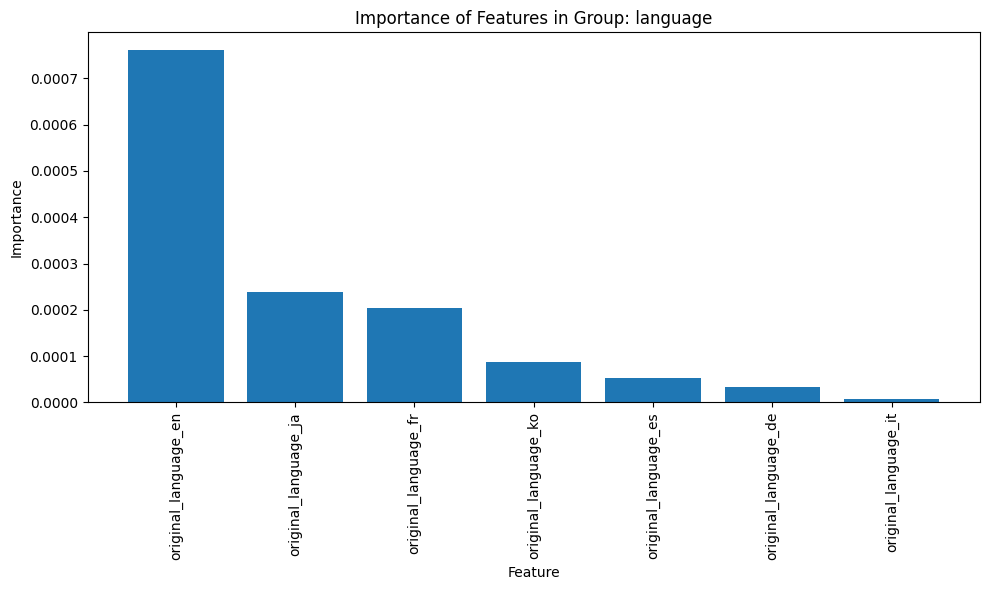

In [ ]:
groups = ['genre', 'adaptation_type', 'language']
for g in groups:
    plot_group_importance(feature_importance_df, g)

# Conclusiones

De los datos utilizados junto al posterior análisis que se les realizó, podemos extraer las siguientes recomendaciones para las empresas dedicadas a la industria cinematográfica:

1. **Planificación estratégica**:
  * **_Fechas de estreno_**: Organizar de tal manera que las fechas de estreno puedan coincidir con épocas significativas para el público objetivo de las películas, como es el caso de mediados de años, el cual calza con vacaciones de verano del hemisferio norte.

2. **Diversificación de géneros y adaptaciones**:
  * Si bien, los gráficos mostraban que los géneros de acción y aventura, junto con las adaptaciones de cómics, eran los que sobresalían en ingresos, esto no significa que sean los tópicos que mayor ingreso tendrán siempre, solo muestra en lo que más se ha invertido hasta ahora en la industria. Es por lo anterior que se promueve invertir en variedad de géneros, tipos de adaptaciones poco exploradas del cine, para poder atraer a diferentes audiencias y de esta forma abrir nuevas oportunidades de mercado.

3. **Influencia de factores culturales**:
  * Destinar parte del presupuesto en la promoción y distribución de los filmes, provocará un mayor alcance de los proyectos cinematográficos, es por ello que las películas en inglés alcanzan grandes números de ingresos.

4. **Invertir en calidad**:
  * Las franquicias de acción, aventura y ciencia ficción alcanzaron grandes números de presupuestos en los gráficos, probablemente al alto costo de los efectos especiales. Este es un rasgo crucial a tener en cuenta para realizar un minucioso trabajo en la experiencia visual del público, garantizando así un éxito en ganancias.